In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import eofs
from eofs.xarray import Eof
import cftime
import nc_time_axis
import cmocean as cmo
import mtspec

# from pylab import *

import datetime
import time
import glob, os
import math
import matplotlib.colors as colors
from defs import trim_axs, lon180
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cartopy.mpl.ticker as cticker

In [2]:
folder = '/Volumes/External/DataPlioMIP2/Data/Processed/'
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F','HadGEM3']

## Figure S05

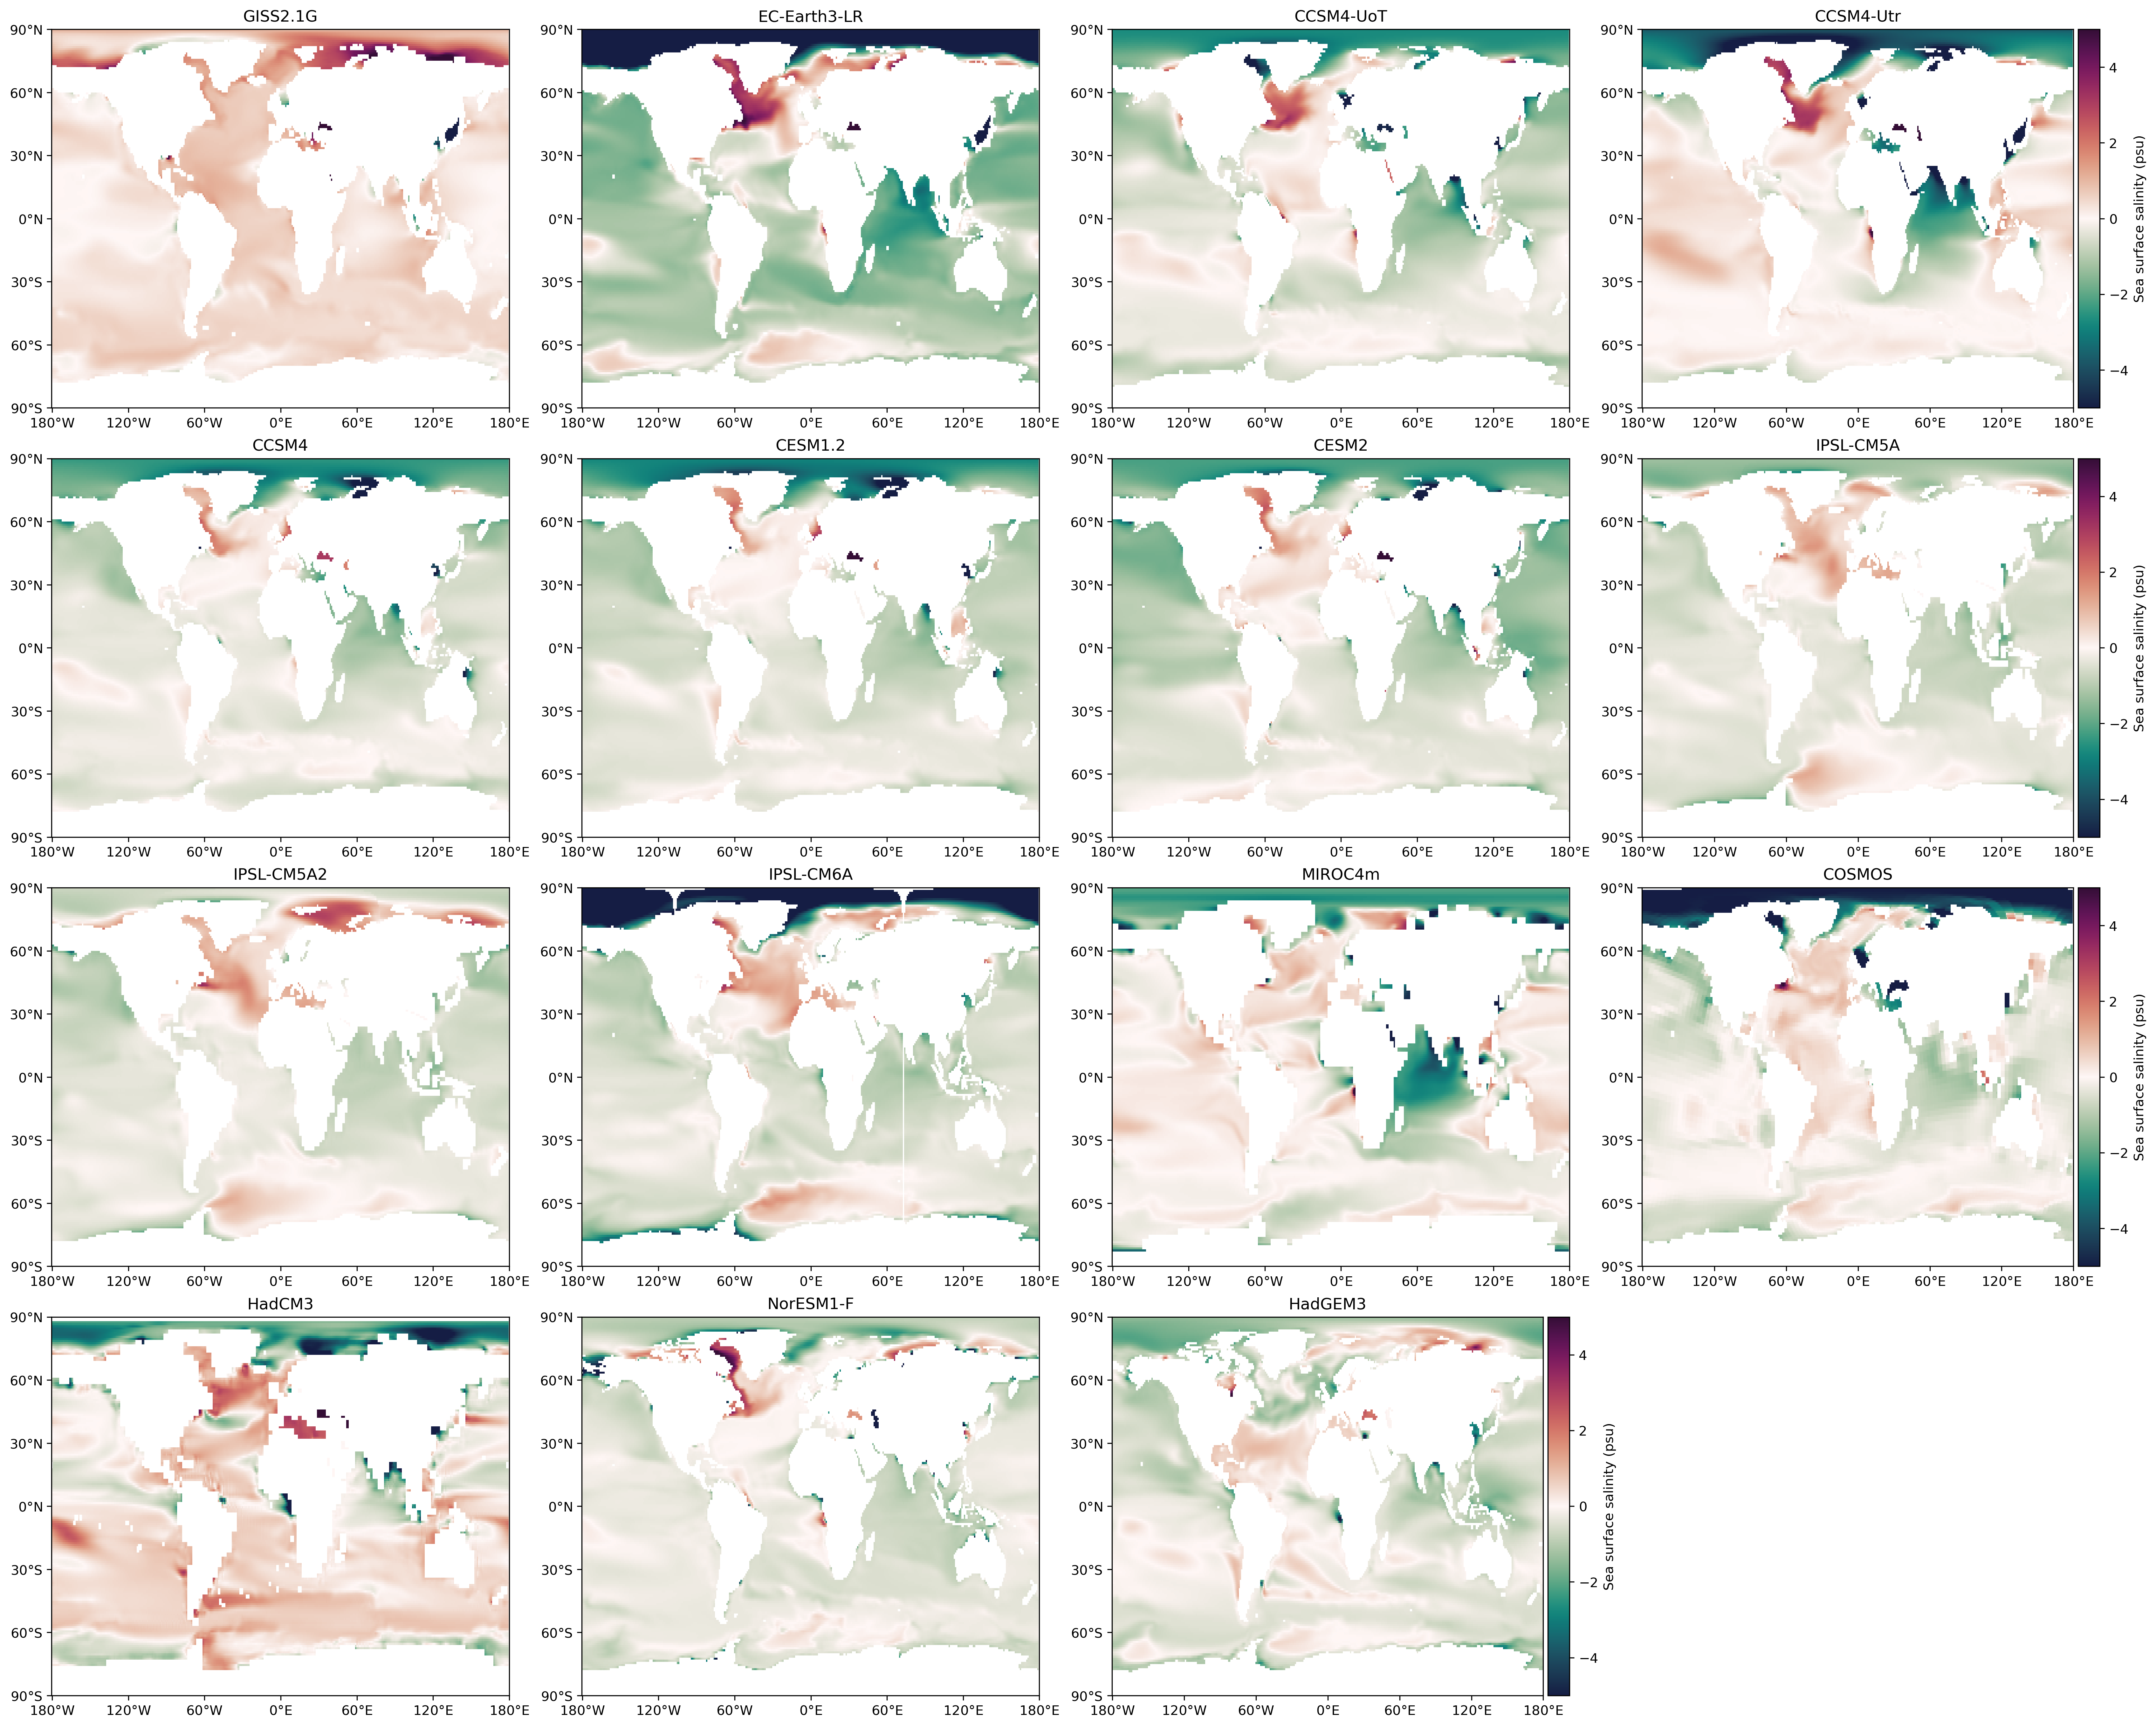

In [3]:
fig1, axs = plt.subplots(nrows=4, ncols=4, figsize=(22,18), constrained_layout=True, dpi=300)
axs = trim_axs(axs, len(modellist))

y_pos = np.array([-90,-60,-30,0,30,60,90])
ytext = ('90$\degree$S', '60$\degree$S', '30$\degree$S', '0$\degree$N', '30$\degree$N', '60$\degree$N', '90$\degree$N')

x_pos = np.array([-180,-120,-60,0,60,120,180])
xtext = ('180$\degree$W', '120$\degree$W', '60$\degree$W', '0$\degree$E', '60$\degree$E', '120$\degree$E', '180$\degree$E')

for ax, i in zip(axs, range(0,len(modellist))):
    model = modellist[i]
    ds1 = xr.open_dataset(folder+model+'/E280/'+'SSS_100yr.nc')
    ds1 = lon180(ds1)
    ds2 = xr.open_dataset(folder+model+'/Eoi400/'+'SSS_100yr.nc')
    ds2 = lon180(ds2)
    im = ax.pcolormesh(ds1.lon, ds1.lat, ds2.sss-ds1.sss, cmap='cmo.curl', shading='auto', vmin = -5, vmax = 5)
    ax.set_title(model)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(ytext)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(xtext)
    if i == 3 or i == 7 or i == 11 or i ==14:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig1.colorbar(im, cax = cax, orientation='vertical', label = 'Sea surface salinity (psu)')
        
plt.savefig('figs05.png', bbox_inches='tight')

## Figure S01

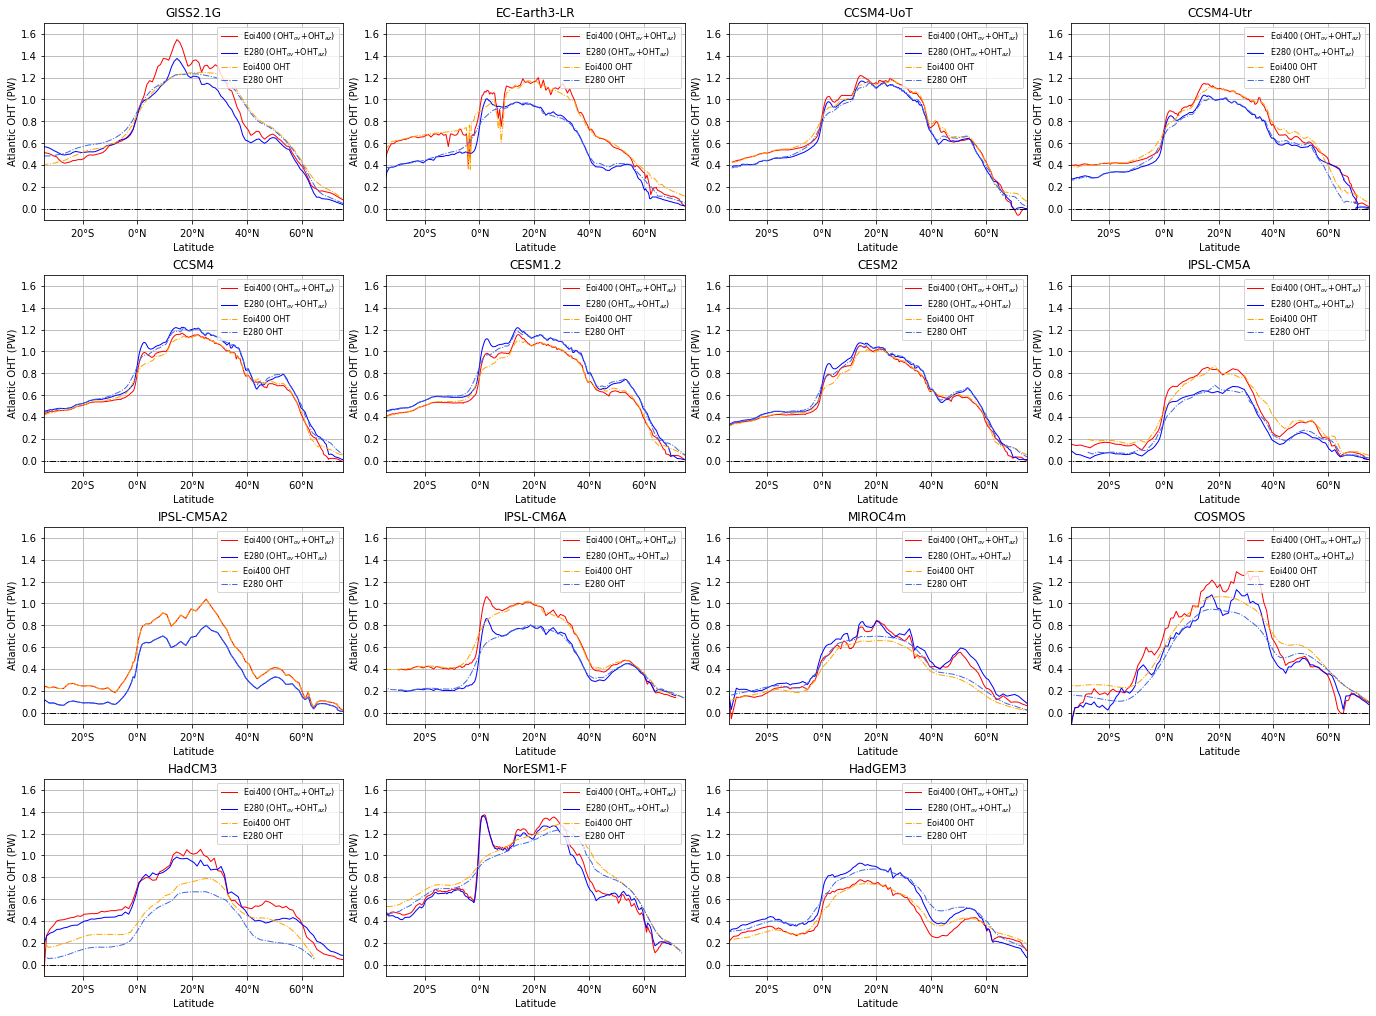

In [4]:
x_pos = np.array([-20,0,20,40,60])
xtext = ('20$\degree$S', '0$\degree$N', '20$\degree$N', '40$\degree$N', '60$\degree$N')

fig1, axs = plt.subplots(nrows=4, ncols=4, figsize=(19, 14), constrained_layout=True)

axs = trim_axs(axs, len(modellist))

for ax, i in zip(axs, range(0,len(modellist))):
    model = modellist[i]
    ds = xr.open_dataset(folder+model+'/Eoi400/decomOHT_100yr.nc')
    (ds.OHTov+ds.OHTaz).plot(ax = ax, color='r', linestyle = '-', linewidth = 1, label='Eoi400 (OHT$_{ov}$+OHT$_{az}$)')
    ds = xr.open_dataset(folder+model+'/E280/decomOHT_100yr.nc')
    (ds.OHTov+ds.OHTaz).plot(ax = ax, color='b', linestyle = '-', linewidth = 1, label='E280 (OHT$_{ov}$+OHT$_{az}$)')
    if model == 'COSMOS' or model == 'HadCM3' or model == 'MIROC4m':
        ds = xr.open_dataset(folder+model+'/Eoi400/OHT_100yr_impl.nc')
    else:
        ds = xr.open_dataset(folder+model+'/Eoi400/OHT_100yr.nc')
    ds.OHT.plot(ax = ax, color='orange', linestyle = '-.', linewidth = 1, label='Eoi400 OHT')
    if model == 'COSMOS' or model == 'HadCM3' or model == 'MIROC4m':
        ds = xr.open_dataset(folder+model+'/E280/OHT_100yr_impl.nc')
    else:
        ds = xr.open_dataset(folder+model+'/E280/OHT_100yr.nc')
    ds.OHT.plot(ax = ax, color='royalblue', linestyle = '-.', linewidth = 1, label='E280 OHT')
    ax.set_xlim([-34, 75])
    ax.set_ylim([-0.1, 1.7])
    ax.set_title(model)
    ax.legend(loc='upper right', fontsize=8)
    ax.plot([-40,80],[0,0], color='black',linestyle='-.', linewidth = 1)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(xtext)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Atlantic OHT (PW)')
    ax.grid(True)
    
plt.savefig('figs01.png', bbox_inches='tight')

## Figure S08

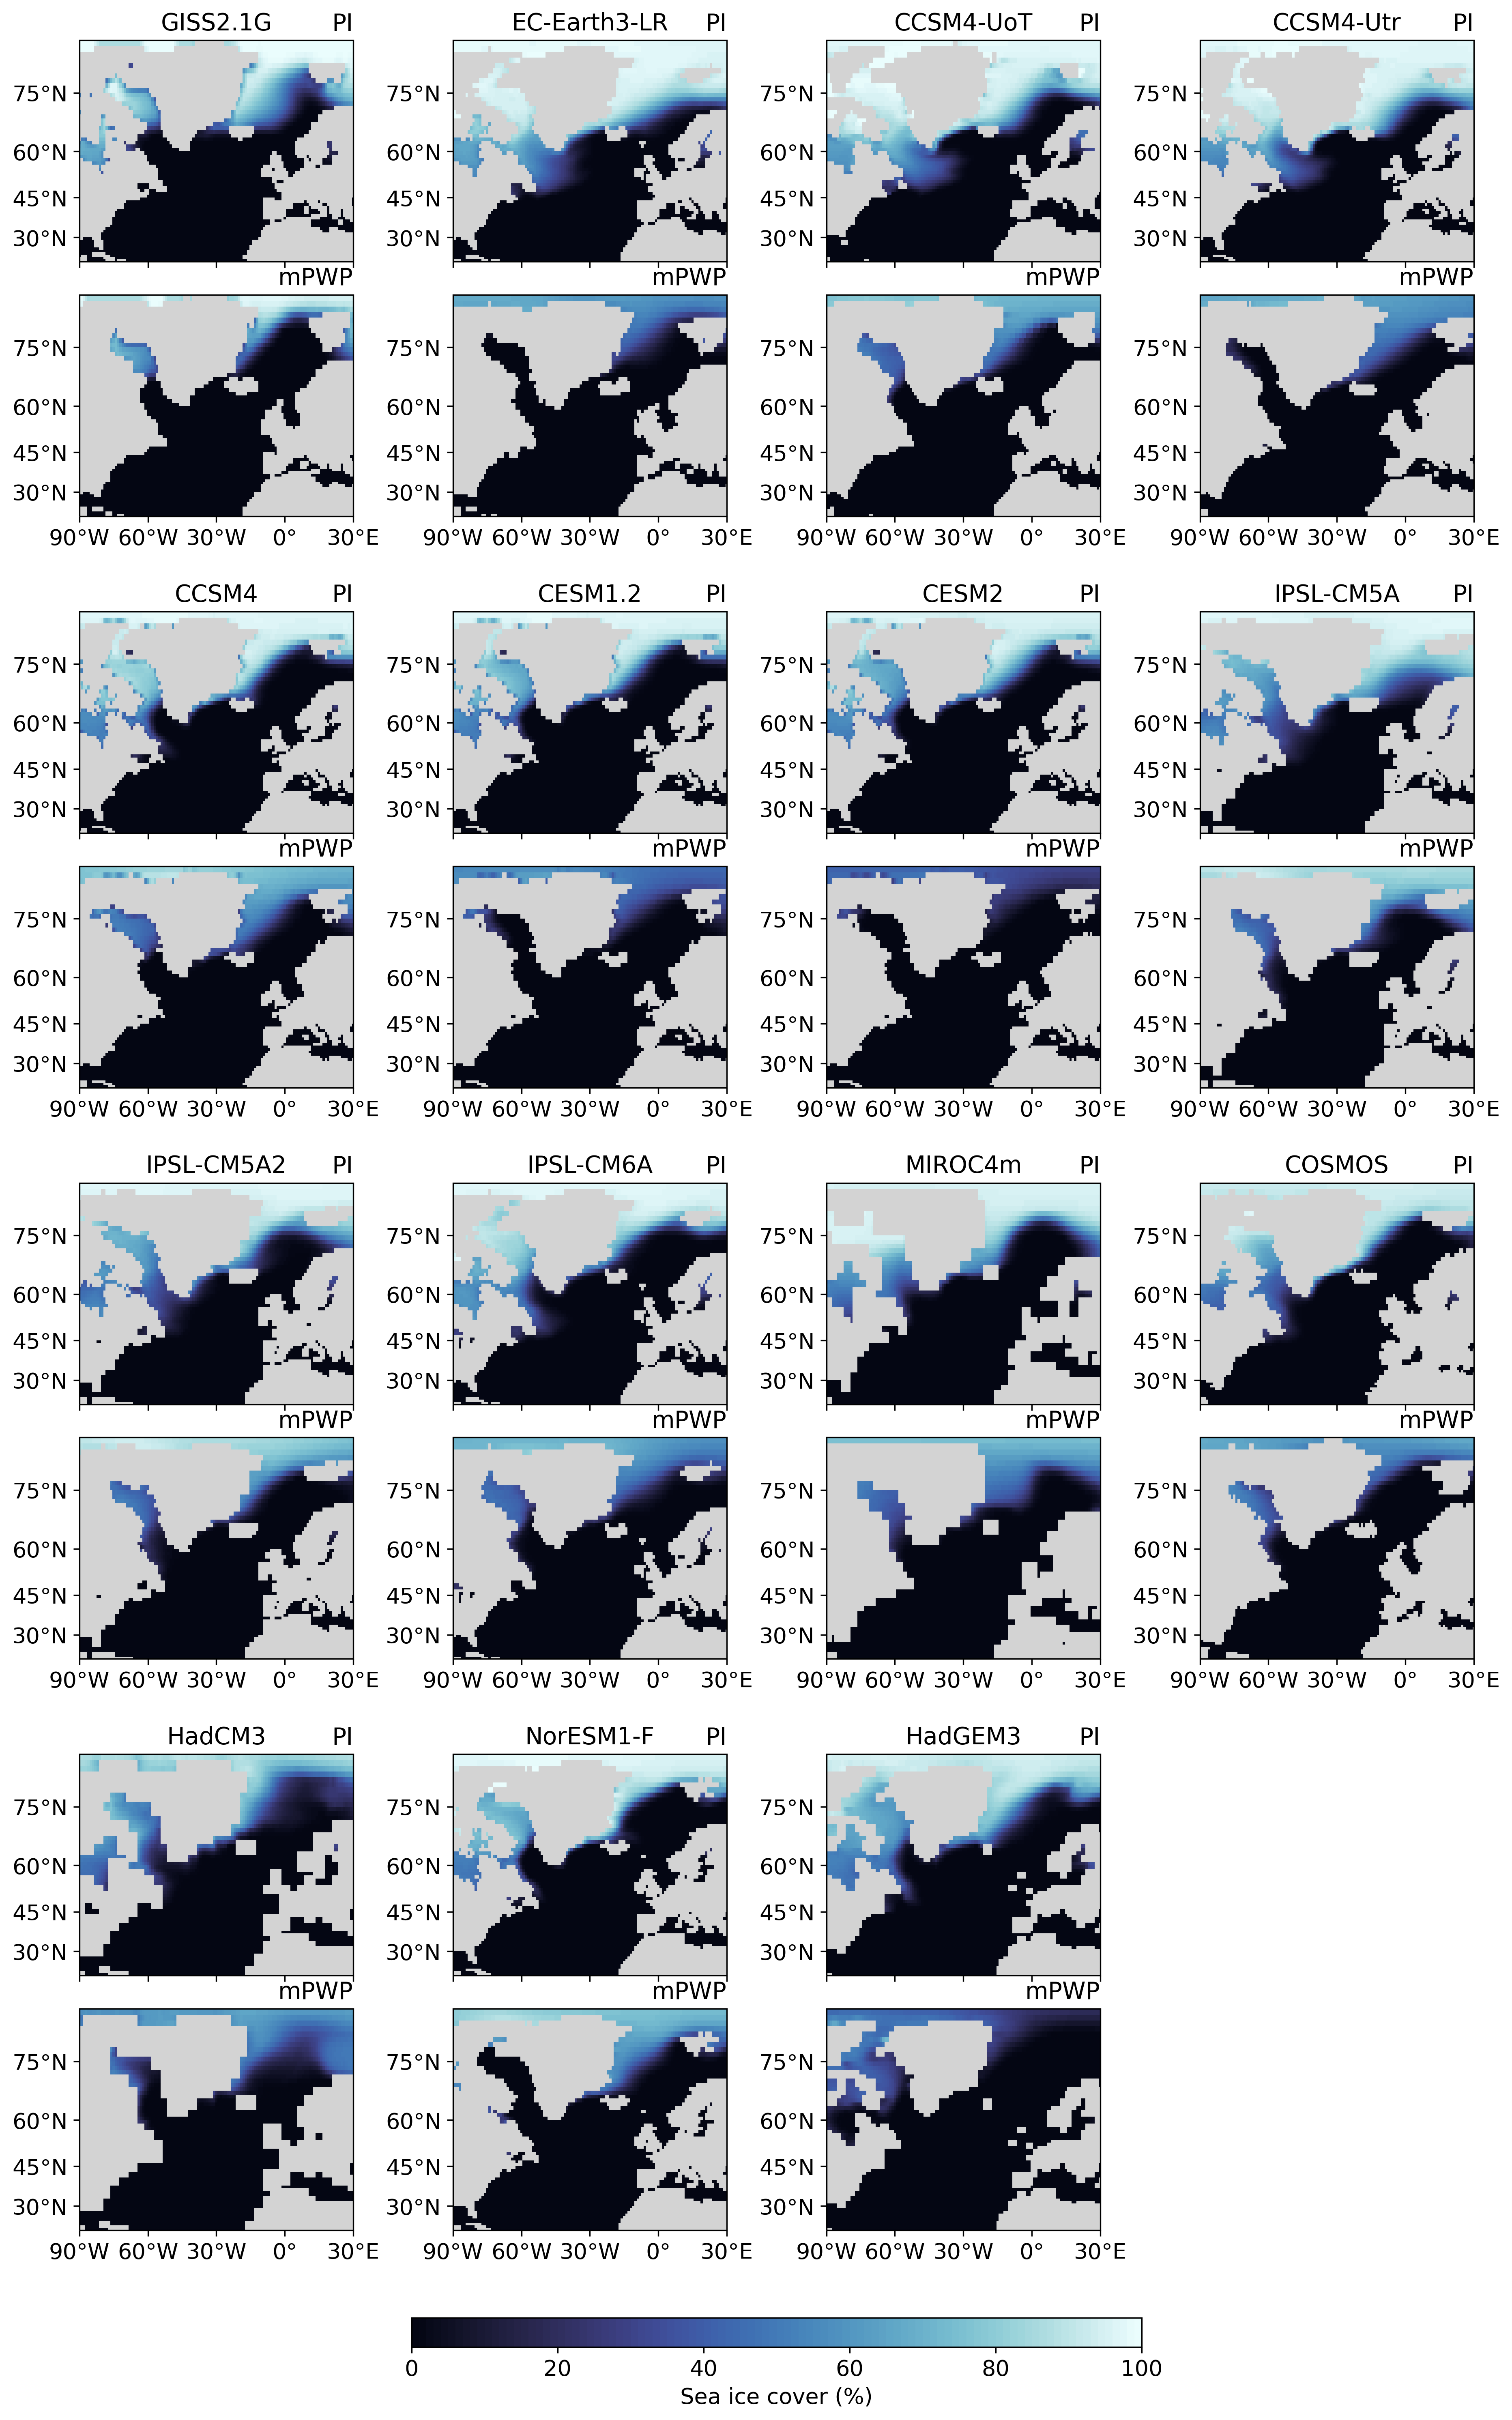

In [6]:
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize'] = 13

fig = plt.figure(figsize=(15, 24), dpi=300)
outer = gridspec.GridSpec(4, 4, wspace=0.1, hspace=0.2)

cmap1 = plt.get_cmap('cmo.ice', 100)
cmap1.set_under('lightgrey')
    
for i in range(len(modellist)):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.15)
    model = modellist[i]
    for j in range(2):
        ax = plt.subplot(inner[j], projection = ccrs.Miller())
        if j == 0:
            ds = lon180(xr.open_dataset(folder+model+'/E280/SI_100yr.nc'))
            ax.set_title(model, fontsize=14)
            ax.tick_params(labelbottom=False) 
            ax.set_title('PI', fontsize=14, loc='right')
        elif j==1:
            ds = lon180(xr.open_dataset(folder+model+'/Eoi400/SI_100yr.nc'))
            ax.set_title('mPWP', fontsize=14, loc='right')
        im = ax.pcolormesh(ds.lon, ds.lat, ds.si_mean.fillna(-100), transform = ccrs.PlateCarree(), cmap=cmap1, shading='auto', vmin = 0, vmax =100)
        ax.set_extent([-90, 30, 20, 85], ccrs.PlateCarree())
        
        ax.set_xticks(np.arange(-90,31,30), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)

        ax.set_yticks(np.arange(30,80,15), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)
        
        fig.add_subplot(ax)
        
fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9)
    # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.3, 0.11, 0.4, 0.01])
    # Draw the colorbar
cbar=fig.colorbar(im, cax=cbar_ax,orientation='horizontal', label='Sea ice cover (%)', pad=0.01)

plt.savefig('figs08.png', bbox_inches='tight')

## Figure S06: MMM top 100m salinity plots without HadGEM3

In [7]:
folder = '/Volumes/External/DataPlioMIP2/Data/Processed/'
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3','NorESM1-F']#, 'HadGEM3']

model = 'CESM1.2'
ds = xr.open_dataset(folder+model+'/Eoi400/'+'SST_annual_100yr.nc')
ds = lon180(ds)

#Compute weights for SST averaging
weights = np.cos(np.deg2rad(ds.lat))
weights.name = "weights"

def preprocessing(ds): 
    ds = lon180(ds)
    return ds.expand_dims(dim='model')

paths = []
for i in range(len(modellist)):
    paths.append(folder+modellist[i]+'/E280/'+'so100m_100yr.nc')
    
dsE280 = xr.open_mfdataset(paths, concat_dim='model',combine='nested', preprocess = preprocessing)
s100E280 = dsE280.s100m.where(dsE280.s100m.count(dim='model')>10) #Only show SSS where more than 10 models indicate ocean grid cells
mmmE280 = s100E280.mean(dim='model')

paths = []
for i in range(len(modellist)):
    paths.append(folder+modellist[i]+'/Eoi400/'+'so100m_100yr.nc')
    
dsEoi400 = xr.open_mfdataset(paths, concat_dim='model',combine='nested', preprocess = preprocessing)
s100Eoi400 = dsEoi400.s100m.where(dsEoi400.s100m.count(dim='model')>10) #Only show SSS where more than 10 models indicate ocean grid cells
mmmEoi400 = s100Eoi400.mean(dim='model')

In [8]:
#Arrays that count how many models show the same + or - sign for Eoi400-E280
count_pos = mmmEoi400.where((s100Eoi400-s100E280)>0).count(dim='model')
count_neg = mmmEoi400.where((s100Eoi400-s100E280)<0).count(dim='model')

#Construct 2D arrays of longitude and latitude to produce scatter plots for significance (>= 12 models agree on sign)
lon = dsE280.lon
lat = dsE280.lat

coords = xr.Dataset(data_vars = dict(lat2D=(["lat", "lon"], np.repeat(lat.values[:, np.newaxis], len(lon), axis=1))), coords = dict(lat = lat.values, lon = lon.values))
coords['lon2D'] = coords.lat2D.copy(deep=True)
coords.lon2D[:] = np.transpose(np.repeat(lon.values[:, np.newaxis], len(lat), axis=1))

threshold = 12
mask_pos = count_pos.where(count_pos>=threshold)
mask_neg = count_neg.where(count_neg>=threshold)


/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/regionmask/core/plot.py:12: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  coords += [np.asarray(p.exterior)[:, :2]] + [


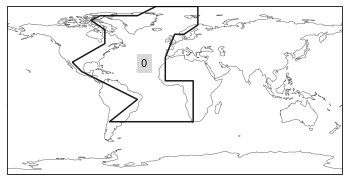

In [9]:
#Create Atlantic mask to exclude points in Mediterranean and North Sea
import regionmask
model = 'CCSM4'
Atlantic = np.array([[-110,30],[-75,50],[-75, 65],[-90,75],[-80,80],[-40,80], [-20,90], [25,90], [25,80], [25,70],[10,60],[0,60],[-10,35], [-10,10], [20,10], [20,-34], [-70,-34], [-40, -10], [-70,5], [-100,20]])
region = regionmask.Regions([Atlantic])

ax = region.plot()
ax.set_extent([0, 350, -90, 90], crs=ccrs.PlateCarree())

# define lat/ lon grid
ds = xr.open_dataset(folder+model+'/Eoi400/'+'SST_annual_100yr.nc')
ds = lon180(ds)

mask_Atl_reg = region.mask(ds.lon.values, ds.lat.values)

In [10]:
#Compute zonal mean change in SSS for Atlantic and standard deviation of zonal mean change
zmsss = mmmEoi400.where(mask_Atl_reg>-1).mean(dim='lon')-mmmE280.where(mask_Atl_reg>-1).mean(dim='lon')
stdsss = (dsEoi400.s100m.where(mask_Atl_reg>-1).mean(dim='lon')-dsE280.s100m.where(mask_Atl_reg>-1).mean(dim='lon')).std(dim='model')

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


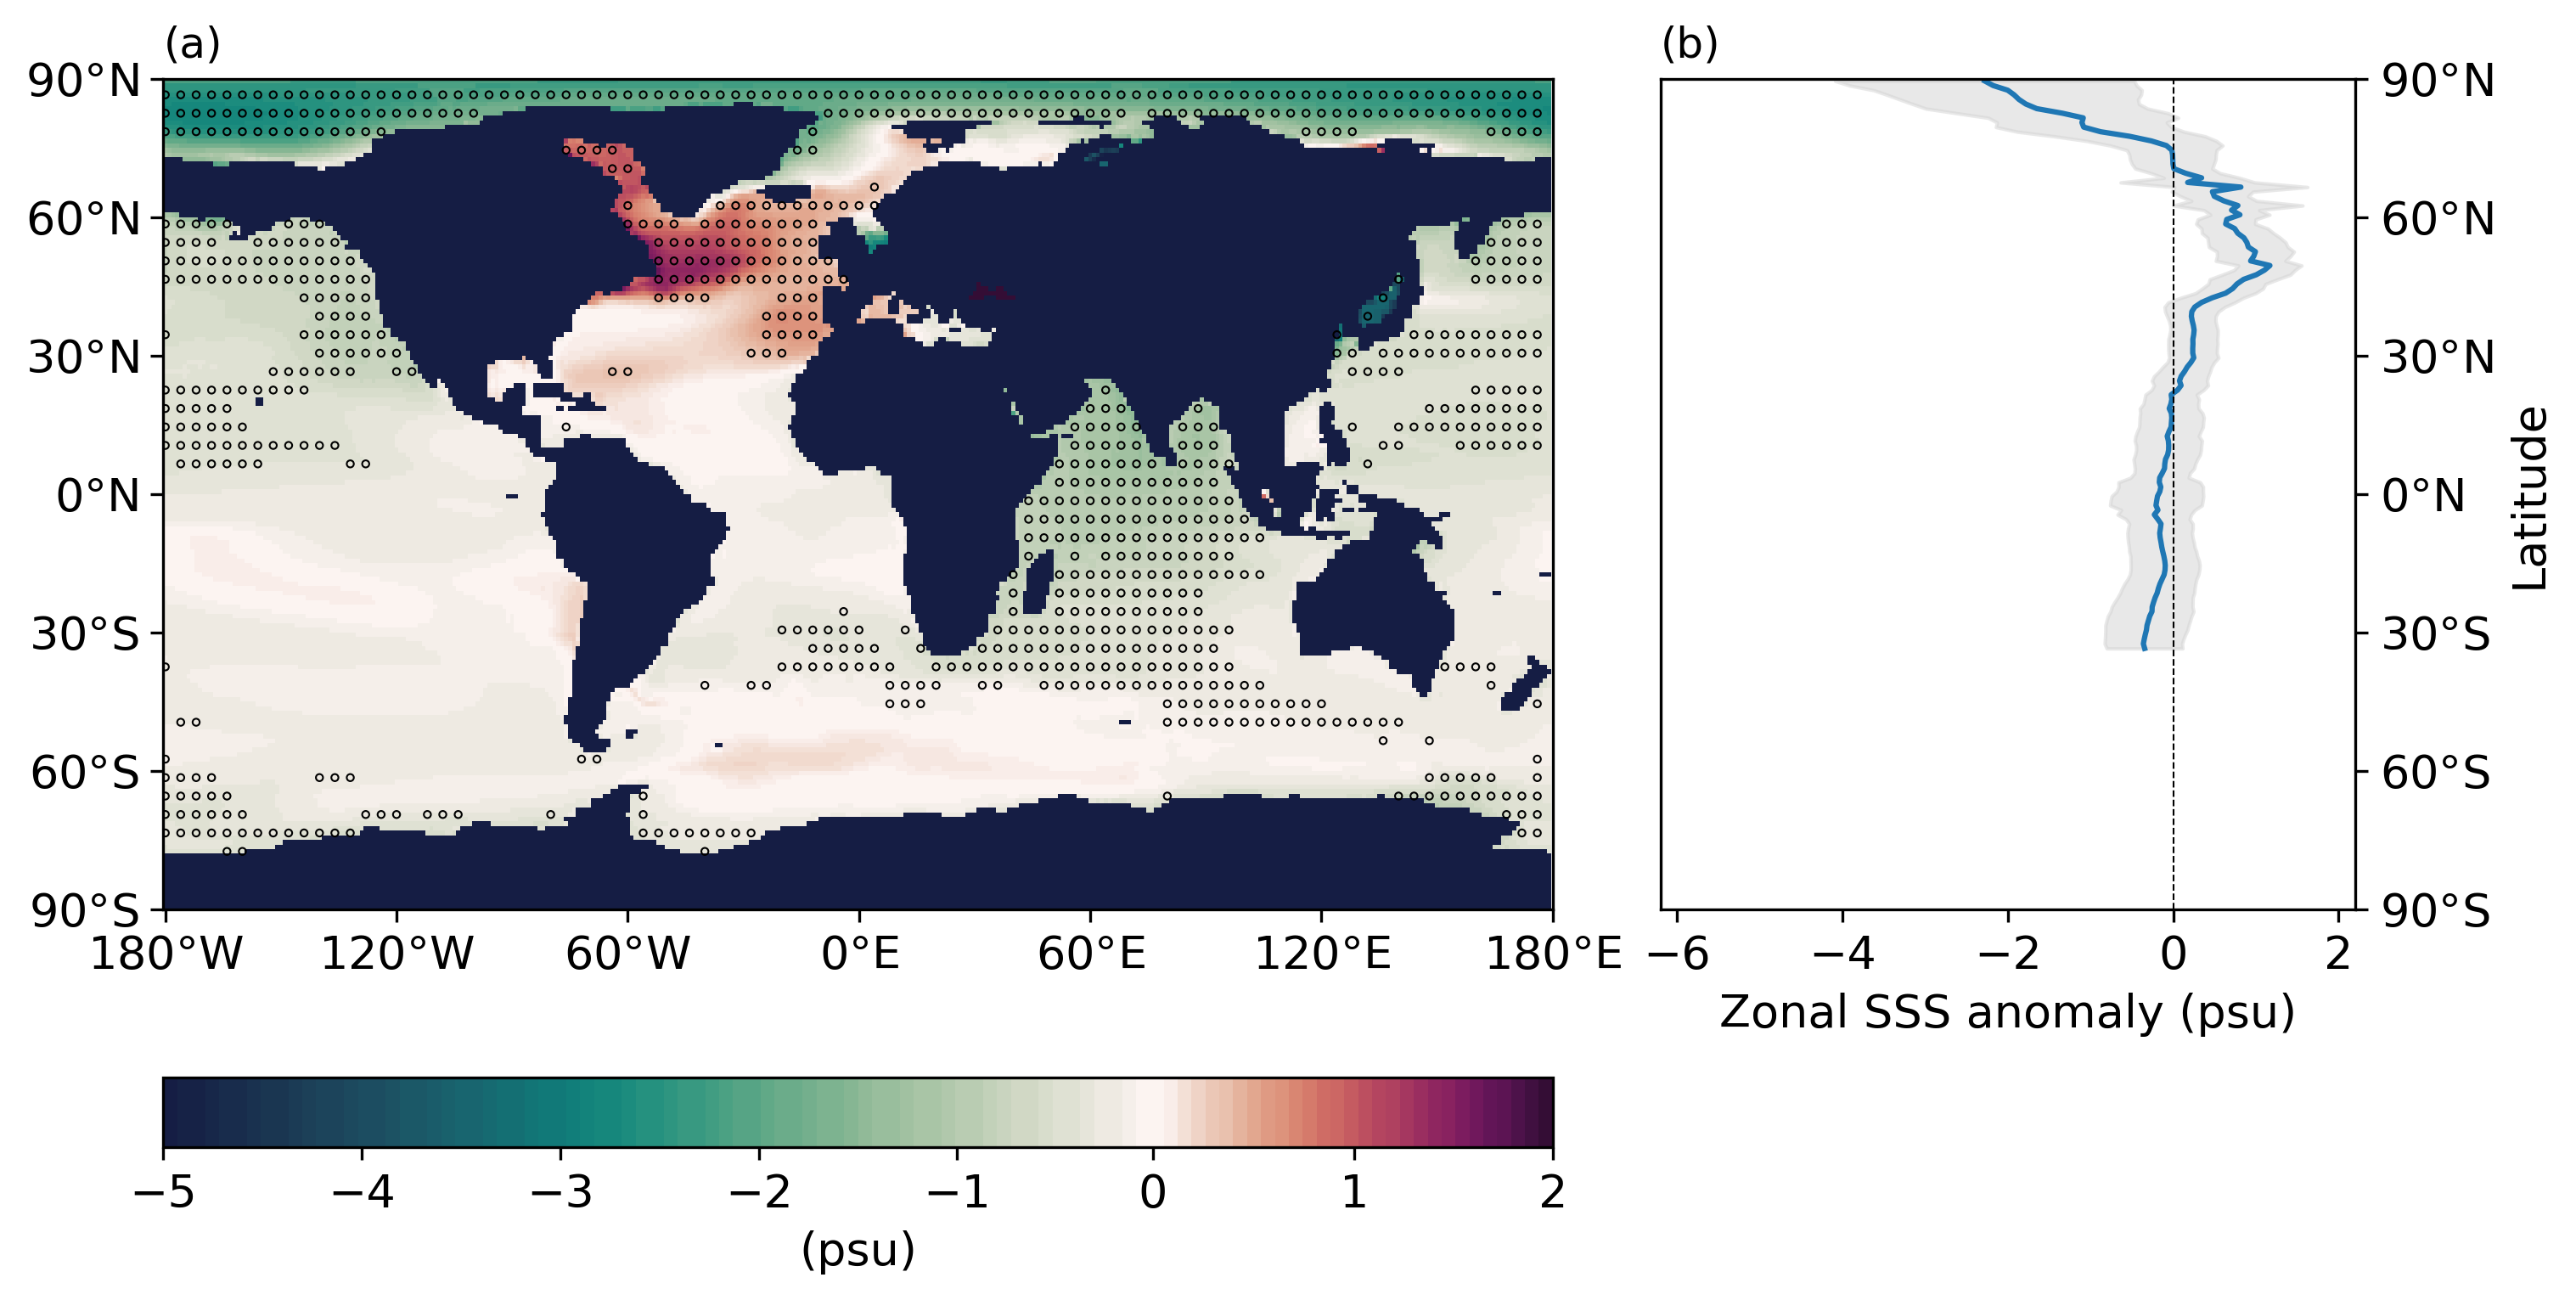

In [11]:
y_pos = np.array([-90,-60,-30,0,30,60,90])
ytext = ('90$\degree$S', '60$\degree$S', '30$\degree$S', '0$\degree$N', '30$\degree$N', '60$\degree$N', '90$\degree$N')

x_pos = np.array([-180,-120,-60,0,60,120,180])
xtext = ('180$\degree$W', '120$\degree$W', '60$\degree$W', '0$\degree$E', '60$\degree$E', '120$\degree$E', '180$\degree$E')

plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize'] = 13

fig1 = fig = plt.figure(figsize=(10,5),dpi=300, constrained_layout=True)
gs = gridspec.GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:2])

divnorm = colors.TwoSlopeNorm(vmin=-5., vcenter=0, vmax=2)
cmap1 = plt.get_cmap('cmo.curl',100)
cmap1.set_under('darkgrey')

im = ax1.pcolormesh(dsE280.lon, dsE280.lat, (mmmEoi400-mmmE280).fillna(-100), cmap=cmap1, shading='auto', norm=divnorm)
cs1 = ax1.scatter(coords.lon2D.where(mask_pos>0)[::4,::4], coords.lat2D.where(mask_pos>0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5)
cs2 = ax1.scatter(coords.lon2D.where(mask_neg>0)[::4,::4], coords.lat2D.where(mask_neg>0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5)
ax1.set_title('(a)', loc='left')
plt.yticks(y_pos, ytext)
plt.xticks(x_pos,xtext)
fig1.colorbar(im, ax = ax1, orientation='horizontal', label = '(psu)')

ax2 = fig.add_subplot(gs[0, 2])
ax2.plot(zmsss, dsE280.lat)
ax2.plot([0,0],[-90,90], linewidth=0.5, linestyle = '--', color='black')
ax2.fill_betweenx(dsE280.lat, zmsss-stdsss, zmsss+stdsss, color='lightgrey', alpha=0.5)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.yticks(y_pos, ytext)
ax2.set_ylim([-90,90])
ax2.set_xlim([-6.2,2.2])
ax2.set_title('(b)', loc='left')
ax2.set_xlabel('Zonal SSS anomaly (psu)')
ax2.set_ylabel('Latitude')
plt.savefig('figs06.png', bbox_inches='tight')